In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [35]:
df = pd.read_parquet("/scratch/groups/horence/JuliaO/single_cell/SZS_pipeline2/data/TSP2_10x_rerun_with_postprocessing_3prime_cellann.pq",columns=["cell","numReads","called","geneR1A_uniq", "free_annotation", "tissue", "compartment"])

In [36]:
df = df[df["called"] == 1]

In [37]:
df.shape

(110119846, 7)

In [38]:
df["total_reads_cell"] = df["cell"].map(df.groupby("cell")["numReads"].sum())

In [39]:
df["num_genes_cell"] = df["cell"].map(df.groupby("cell")["geneR1A_uniq"].nunique())

In [40]:
df = df.drop_duplicates("cell")

In [41]:
df["ontology"] = df["tissue"] + "_" + df["compartment"] + df["free_annotation"]

In [42]:
df["median_numreads"] = df["ontology"].map(df.groupby("ontology")["total_reads_cell"].median())
df.sort_values("median_numreads",inplace=True)

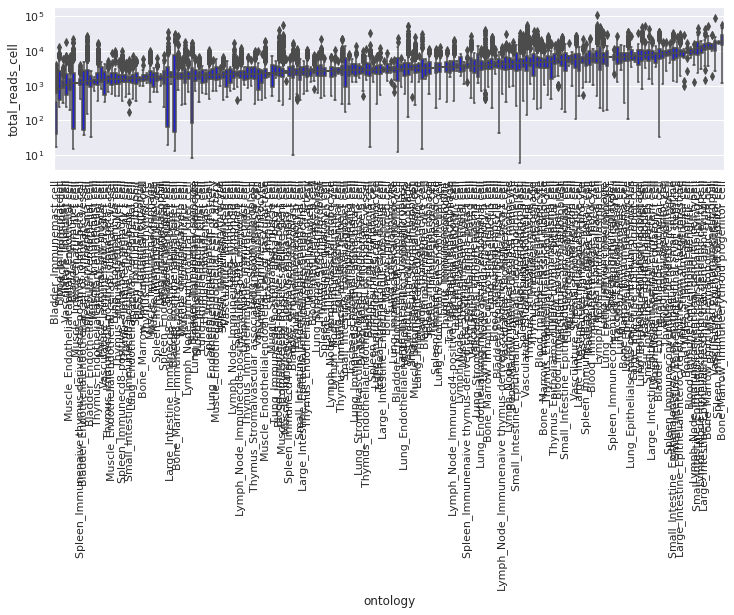

In [43]:
sns.set(rc={'figure.figsize':(12,3)})
g = sns.boxplot(x="ontology",y="total_reads_cell", data = df, color="blue")
plt.yscale("log")
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

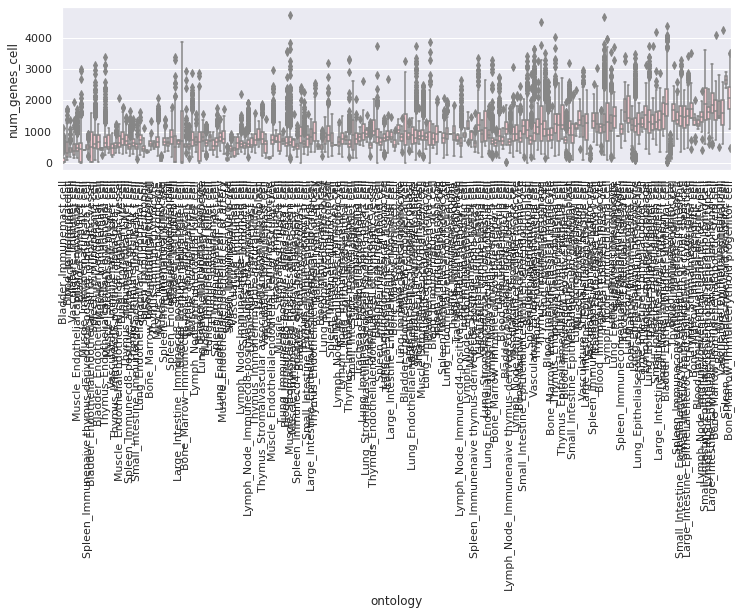

In [44]:
g = sns.boxplot(x="ontology",y="num_genes_cell", data = df.drop_duplicates("cell"), color="pink")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
# plt.yscale("log")
plt.show()